In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report




import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# Reading the data
df = pd.read_csv("diabetes.csv") # 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible

# Replacing Zero with the mean value of the column

In [11]:
df['Glucose'] = df['Glucose'].replace(0, round(df['Glucose'].mean()))
df['BloodPressure'] = df['BloodPressure'].replace(0, round(df['BloodPressure'].mean()))
df['SkinThickness'] = df['SkinThickness'].replace(0, round(df['SkinThickness'].mean()))
df['Insulin'] = df['Insulin'].replace(0, round(df['Insulin'].mean()))
df['BMI'] = df['BMI'].replace(0, round(df['BMI'].mean()))


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.250000,26.743490,118.757812,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.117203,9.546733,93.039581,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,80.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking the outlier

<AxesSubplot:>

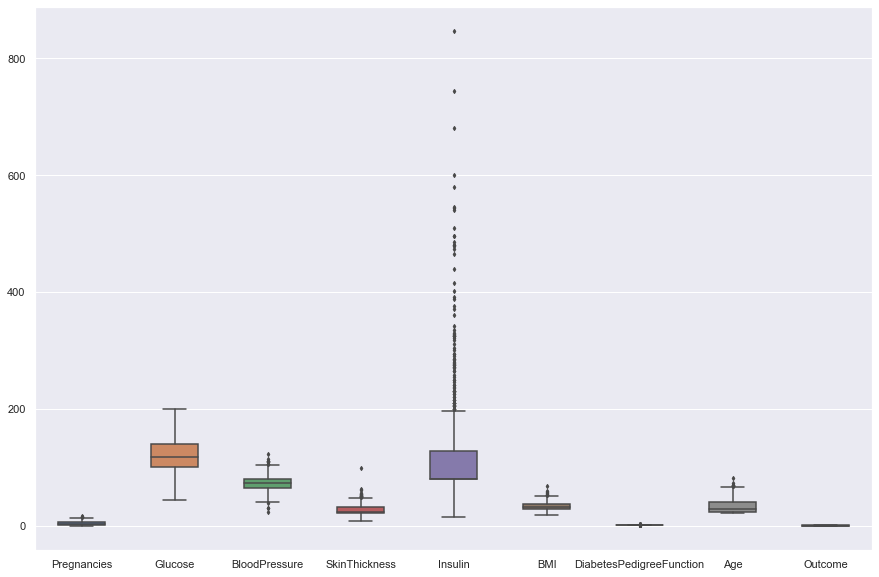

In [13]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data= df, width=0.5, ax=ax, fliersize=3)

In [14]:
# lets reomve outlier using qunatile method

# removing top 2 percent of data
q = df['Pregnancies'].quantile(0.98) 
data_cleaned = df[df['Pregnancies']<q]


#removing 1 % data from blood pressure col
q = data_cleaned['BloodPressure'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['BloodPressure']<q]



#removing 1 % data from skin thickness col
q = data_cleaned['SkinThickness'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

#removing 5 % data from skin insuline col
q = data_cleaned['Insulin'].quantile(0.95) 
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

#removing 1 % data from skin BMI col
q = data_cleaned['BMI'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

#removing 1 % data from skin DiabetesPedigreeFunction col
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

#removing 1 % data from skin DiabetesPedigreeFunction col
q = data_cleaned['Age'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['Age']<q]

<AxesSubplot:>

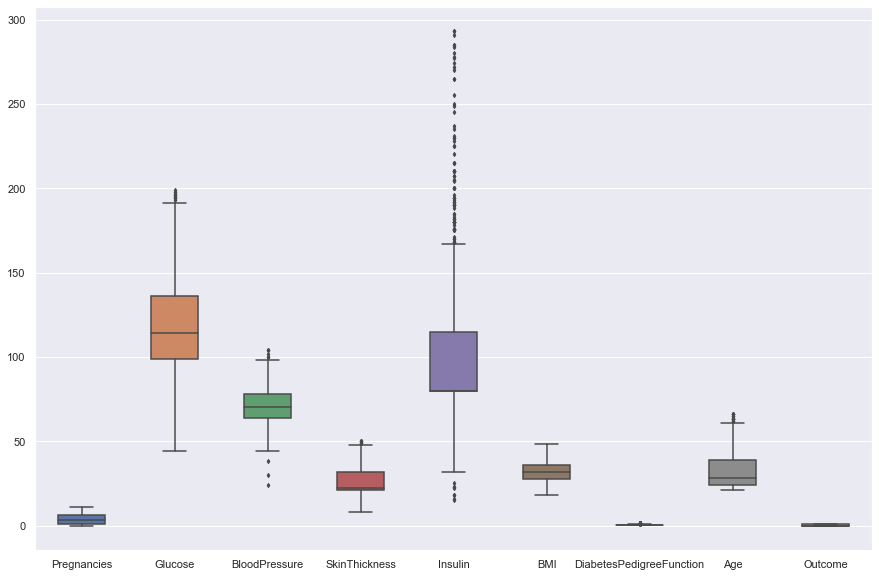

In [15]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data= data_cleaned, width=0.5, ax=ax, fliersize=3)

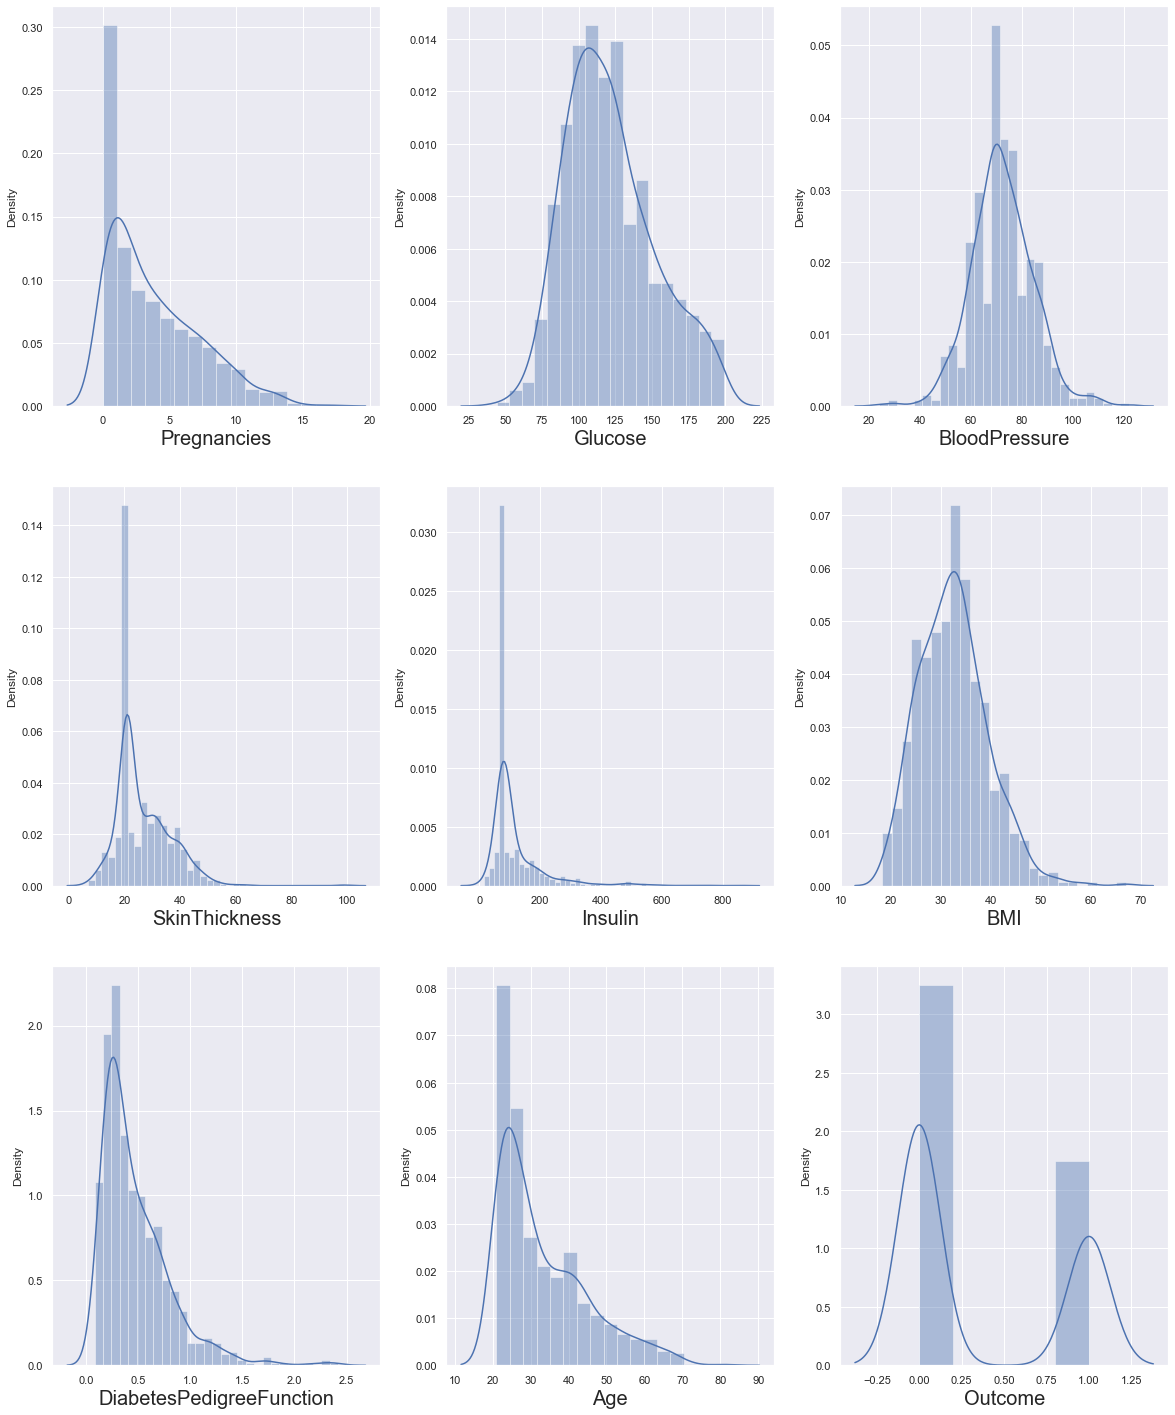

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
colnumber = 1
for col in df:
    if colnumber <=9: # we have 9 col
        ax =plt.subplot(3,3,colnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
    colnumber +=1
plt.show()

In [17]:
fea = data_cleaned.drop('Outcome', axis=1)
label = data_cleaned['Outcome']

# Scaling of Data

In [18]:
scalar = StandardScaler()
xscaled = scalar.fit_transform(fea)

In [19]:
xscaled

array([[ 0.8193721 ,  0.99631453,  0.04393087, ...,  0.28877166,
         0.61833125,  1.63266509],
       [-0.85752913, -1.16686458, -0.49452461, ..., -0.83488339,
        -0.34345476, -0.11527125],
       [ 1.49013259,  2.19808071, -0.67400977, ..., -1.36460649,
         0.77514418, -0.0232746 ],
       ...,
       [ 0.48399185,  0.06923777,  0.04393087, ..., -0.89909225,
        -0.71283634, -0.2072679 ],
       [-0.85752913,  0.24091865, -1.03298009, ..., -0.27305587,
        -0.35042422,  1.35667514],
       [-0.85752913, -0.89217517, -0.13555429, ..., -0.22489922,
        -0.46890511, -0.85124445]])

# Checking multicollinearity

In [22]:
vif = pd.DataFrame()
vif['Features'] = fea.columns
vif["vif"] =[variance_inflation_factor(xscaled,i) for i in range(xscaled.shape[1])]

vif

,Features,vif
0,Pregnancies,1.439165
1,Glucose,1.318317
2,BloodPressure,1.240475
3,SkinThickness,1.478414
4,Insulin,1.290603
5,BMI,1.511803
6,DiabetesPedigreeFunction,1.046744
7,Age,1.645731


As we know if vif is more than 5 it has multicollinearity . but we can see we dont have multicollineairty

# Hold out method

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled,label,test_size=0.25)

In [32]:
GNB = GaussianNB()
GNB.fit(xtrain,ytrain)
y_pred = GNB.predict(xtest)

In [33]:
GNB.score(xtrain,ytrain)

0.7844311377245509

In [29]:
print(accuracy_score(ytest,y_pred))

0.7245508982035929


In [37]:
#Classification report of train data
y_trainPred = GNB.predict(xtrain)
print(confusion_matrix(ytrain,y_trainPred))
print(classification_report(ytrain,y_trainPred))

[[295  48]
 [ 60  98]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       343
           1       0.67      0.62      0.64       158

    accuracy                           0.78       501
   macro avg       0.75      0.74      0.75       501
weighted avg       0.78      0.78      0.78       501



In [39]:
#classification on Test Data
y_testPred = GNB.predict(xtest)
print(confusion_matrix(ytest, y_testPred))
print(classification_report(ytest,y_testPred))

[[86 23]
 [23 35]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       109
           1       0.60      0.60      0.60        58

    accuracy                           0.72       167
   macro avg       0.70      0.70      0.70       167
weighted avg       0.72      0.72      0.72       167



# ROC, AUC

In [44]:
# Area Under Curve
auc = roc_auc_score(ytest, y_pred)
auc

0.6962195507750711

In [41]:
fpr, tpr, thresholds = roc_curve(ytest, y_testPred)

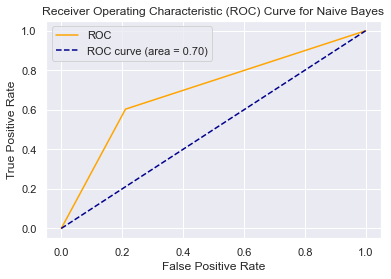

In [49]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()